In [2]:
# 导入需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg # mpimg 用于读取图片
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings  
warnings.filterwarnings("ignore")  
%matplotlib inline

In [3]:
def loadData(Dataname):
    Path = 'source/'+str(Dataname)
    TextFile = pd.read_csv(Path)
    return TextFile

In [4]:
trainData = loadData('cs-training.csv')

 <img src="source/Image1.png"/>

# 特征缺失情况：
* 月收入和家属数量两个变量出现缺失，分别缺失29731个和3924个

In [5]:
trainData.describe().apply(lambda x:round(x,2))

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


In [6]:
Feature_name =list(trainData.columns)
Feature_name

['Unnamed: 0',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

# 数据预处理----缺失值、异常值、

### 利用随机森林来弥补MonthlyIncome缺失值 ，同时  删除 NumberOfDependents变量缺失部分

In [7]:
## 利用随机森林来弥补缺失值 MonthlyIncome 
def fill_missing(df):
    df_monthIncome_missing = df.ix[df['MonthlyIncome'].isnull(),[1,2,3,4,5,7,8,9,10]].values
    df_monthIncome_unmissing = df.ix[df['MonthlyIncome'].notnull(),[1,2,3,4,5,7,8,9,10]].values
    df_monthIncome_Y =  df.ix[df['MonthlyIncome'].notnull(),[6]].values
    # 建立一个训练模型，尽量把误差缩小
    train_X,test_X ,train_Y,test_Y = train_test_split(df_monthIncome_unmissing,df_monthIncome_Y,test_size=0.05,random_state =2018,shuffle =True)
    model_Reg = RandomForestRegressor(random_state=0,n_estimators=100,max_depth  =8,min_samples_split=6)
    model_Reg.fit(train_X,train_Y)
    predicted = model_Reg.predict(test_X)
    print("模型的R^2值为：{0}".format(round(r2_score(test_Y,predicted),3))) 
    df.loc[df['MonthlyIncome'].isnull(),['MonthlyIncome']] = model_Reg.predict(df_monthIncome_missing)
    return df

In [8]:
trainData =fill_missing(trainData)

模型的R^2值为：0.71


In [9]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [9]:
##图表分析
# plt.boxplot(Target_data['age'])
# plt.boxplot(Target_data['NumberOfTimes90DaysLate'])

In [10]:
# 删除NumberOfDependents变量缺失部分
data = trainData.dropna()
Target_data = data.drop_duplicates()
# 异常值分析
# 年龄大于0
Target_data =Target_data[Target_data['age']>0]
Target_data =Target_data[Target_data['NumberOfTimes90DaysLate']<90]
Target_data['SeriousDlqin2yrs'] = 1-Target_data['SeriousDlqin2yrs']

In [11]:
Target_data.describe().apply(lambda x:round(x,2))

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,145837.00,145837.00,145837.00,145837.00,145837.00,145837.00,145837.00,145837.00,145837.00,145837.00,145837.00,145837.00
mean,75015.44,0.93,5.93,52.13,0.25,333.91,5584.29,8.54,0.09,1.03,0.07,0.76
std,43290.86,0.25,250.28,14.59,0.70,1945.45,13296.49,5.14,0.49,1.13,0.33,1.12
min,1.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37537.00,1.00,0.03,41.00,0.00,0.17,2008.00,5.00,0.00,0.00,0.00,0.00
50%,75018.00,1.00,0.16,52.00,0.00,0.36,4583.00,8.00,0.00,1.00,0.00,0.00
75%,112498.00,1.00,0.56,62.00,0.00,0.77,7500.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,107.00,13.00,329664.00,3008750.00,58.00,17.00,54.00,11.00,20.00


In [13]:
# 数据集保留
Target_data.iloc[:,1:].to_csv('Traindata_clean.csv',header = True,index = False,sep=',',encoding='utf-8')

### 测试填补模型参数

In [12]:
# 最佳参数 (100, 8, 6, 0.05
# df_monthIncome_missing = trainData.ix[trainData['NumberOfDependents'].isnull(),[1,2,3,4,5,7,8,9,10]].values
# df_monthIncome_unmissing = trainData.ix[trainData['NumberOfDependents'].notnull(),[1,2,3,4,5,7,8,9,10]].values
# df_monthIncome_Y =  trainData.ix[trainData['NumberOfDependents'].notnull(),[11]].values
# n_estimators_list =[100,200];max_depth_list=[4,6,8];min_samples_split_list=[2,4,6];test_size =[0.05,0.1,0.15]
# param_list=[(estimators,max_depth,min_sample,size) for estimators in n_estimators_list for max_depth in max_depth_list for min_sample in min_samples_split_list for size in test_size]
# accury_score ={}
# for i in param_list:
#     now = datetime.now()
#     print('开始时间为：',now)
#     train_X,test_X ,train_Y,test_Y = train_test_split(df_monthIncome_unmissing,df_monthIncome_Y,test_size=i[3],random_state =2018,shuffle =True)
#     model_Reg = RandomForestRegressor(random_state=0,n_estimators=i[0],max_depth  =i[1],min_samples_split=i[2])
#     model_Reg.fit(train_X,train_Y)
#     predicted = model_Reg.predict(test_X)
#     R2_score =round(r2_score(test_Y,predicted),3)
#     accury_score[i] =R2_score
#     print("param{0}模型的R^2值为：{1} and timecost is {2}".format(str(i),R2_score,datetime.now()-now))
# print('结束时间为：', datetime.now())

In [3]:
Target_data = pd.read_csv('Traindata_lean.csv',sep=',',encoding='utf-8')

In [51]:
print("未违约用户人数：{0} ，其占比{.2f}"Target_data['SeriousDlqin2yrs'].value_counts()

1    136125
0      9712
Name: SeriousDlqin2yrs, dtype: int64

# 变量探索性分析

In [ ]:
# data_corr是系数矩阵
data_corr = Target_data.corr()
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(data_corr,linewidths=0.3,annot=True,vmax =0.9,vmin=-0.9) # annot显示数值，vmax，vmin设置旁边柱子上的值
# ax.set_xticks(Target_data.index)

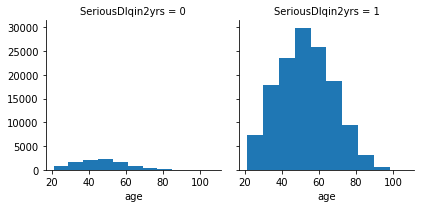

In [39]:
# 自变量与 Y之间的分布
# 违约用户的年龄分布和未违约用户的年龄分布基本一致
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "age",bins = 10);

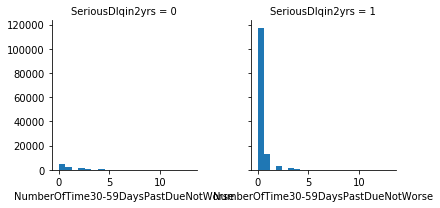

In [44]:
# NumberOfTime30-59DaysPastDueNotWorse自变量与 Y之间的分布
# 违约用户的变量分布和未违约用户的分布基本一致
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "NumberOfTime30-59DaysPastDueNotWorse",bins =20);

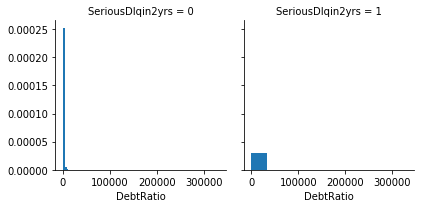

In [49]:
# DebtRatio自变量与 Y之间的分布
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "DebtRatio",density=True,bins=10);

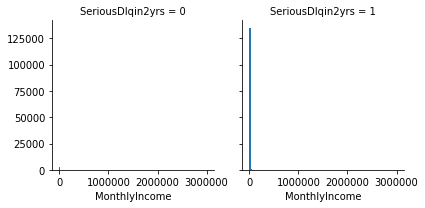

In [52]:
# MonthlyIncome自变量与 Y之间的分布
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "MonthlyIncome",bins=100);

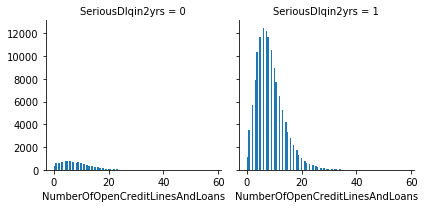

In [54]:
# NumberOfOpenCreditLinesAndLoans Y之间的分布
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "NumberOfOpenCreditLinesAndLoans",bins=100);

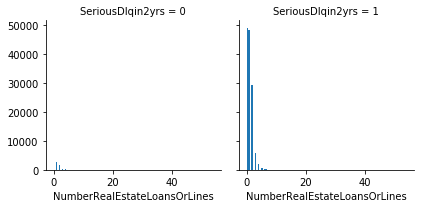

In [57]:
# NumberRealEstateLoansOrLines Y之间的分布
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "NumberRealEstateLoansOrLines",bins=100);

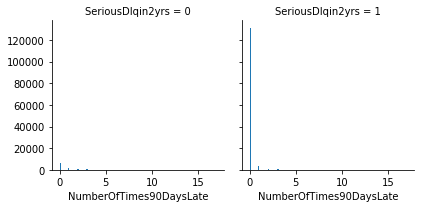

In [58]:
# NumberOfTimes90DaysLate Y之间的分布
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "NumberOfTimes90DaysLate",bins=100);

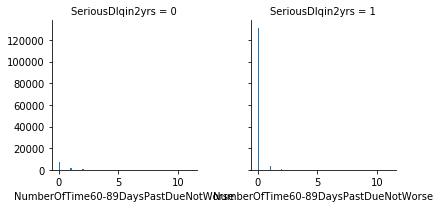

In [59]:
# NumberOfTime60-89DaysPastDueNotWorse Y之间的分布
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "NumberOfTime60-89DaysPastDueNotWorse",bins=100);

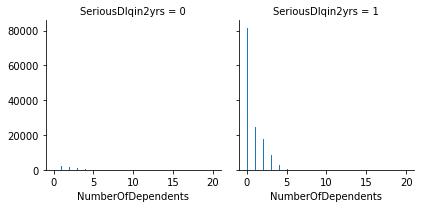

In [60]:
# NumberOfDependents Y之间的分布
g = sns.FacetGrid(Target_data, col="SeriousDlqin2yrs")
g.map(plt.hist, "NumberOfDependents",bins=100);